<h1> Visualizacion Estática </h1>
Este notebook es para la creación del gráfico estatico de banderas.
Primero se cargan las librerias:

In [3]:
import pandas as pd
pd.set_option('display.max_columns', 500)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from PIL import Image
from io import BytesIO

Ahora se carga el df que esta guardado en flags.pkl que fue generado con generate_data.ipynb

In [4]:
df_flags = pd.read_pickle("flags.pkl")
display(df_flags.sort_values(by="sum_unique", ascending=False).head())

,color,AD,AE,AF,AG,AI,AL,AM,AO,AQ,AR,AS,AT,AU,AW,AX,AZ,BA,BB,BD,BE,BF,BG,BH,BI,BJ,BL,BM,BN,BO,BQ,BR,BS,BT,BV,BW,BY,BZ,CA,CC,CD,CF,CG,CH,CI,CK,CL,CM,CN,CO,CR,CU,CV,CW,CX,CY,CZ,DE,DJ,DK,DM,DO,DZ,EC,EE,EG,EH,ER,ES,ET,FI,FJ,FK,FM,FO,FR,GA,GB,GD,GE,GF,GG,GH,GI,GL,GM,GN,GP,GQ,GR,GS,GT,GU,GW,GY,HK,HM,HN,HR,HT,HU,ID,IE,IL,IM,IN,IO,IQ,IR,IS,IT,JE,JM,JO,JP,KE,KG,KH,KI,KM,KN,KP,KR,KW,KY,KZ,LA,LB,LC,LI,LK,LR,LS,LT,LU,LV,LY,MA,MC,MD,ME,MF,MG,MH,MK,ML,MM,MN,MO,MP,MQ,MR,MS,MT,MU,MV,MW,MX,MY,MZ,NA,NC,NE,NF,NG,NI,NL,NO,NP,NR,NU,NZ,OM,PA,PE,PF,PG,PH,PK,PL,PM,PN,PR,PS,PT,PW,PY,QA,RE,RO,RS,RU,RW,SA,SB,SC,SD,SE,SG,SH,SI,SJ,SK,SL,SM,SN,SO,SR,SS,ST,SV,SX,SY,SZ,TC,TD,TF,TG,TH,TJ,TK,TL,TM,TN,TO,TR,TT,TV,TW,TZ,UA,UG,US,UY,UZ,VA,VC,VE,VG,VI,VN,VU,WF,WS,YE,YT,ZA,ZM,ZW,r,g,b,sum_unique,sum_pixels,percentage of pixels
22,white,0.0,572.0,0.0,146.0,211.0,0.0,0.0,0.0,676.0,716.0,113.0,780.0,158.0,0.0,0.0,18.0,28.0,0.0,0.0,0.0,0.0,780.0,726.0,790.0,0.0,1221.0,172.0,380.0,0.0,826.0,0.0,0.0,7.0,211.0,120.0,96.0,96.0,814.0,0.0,0.0,500.0,0.0,320.0,800.0,120.0,818.0,0.0,0.0,0.0,720.0,702.0,432.0,24.0,8.0,2092.0,880.0,0.0,524.0,736.0,181.0,808.0,1096.0,0.0,840.0,716.0,499.0,0.0,0.0,0.0,1664.0,114.0,126.0,48.0,1344.0,800.0,0.0,530.0,0.0,1520.0,0.0,1500.0,0.0,1096.0,1146.0,240.0,0.0,0.0,549.0,981.0,117.0,667.0,0.0,0.0,166.0,78.0,50.0,740.0,614.0,28.0,780.0,1200.0,800.0,1529.0,6.0,720.0,311.0,678.0,710.0,492.0,800.0,1490.0,0.0,447.0,1916.0,203.0,0.0,0.0,292.0,405.0,40.0,306.0,1700.0,546.0,110.0,0.0,172.0,951.0,54.0,0.0,0.0,880.0,832.0,0.0,780.0,480.0,36.0,0.0,1200.0,0.0,0.0,898.0,960.0,262.0,0.0,0.0,198.0,0.0,72.0,100.0,620.0,0.0,110.0,1116.0,0.0,40.0,0.0,642.0,792.0,174.0,98.0,0.0,672.0,543.0,800.0,716.0,780.0,492.0,119.0,32.0,108.0,110.0,520.0,1108.0,800.0,939.0,8.0,408.0,690.0,0.0,9.0,111.0,702.0,556.0,12.0,0.0,720.0,872.0,9.0,0.0,734.0,780.0,0.0,3.0,20.0,327.0,486.0,0.0,1227.0,110.0,731.0,216.0,739.0,780.0,1105.0,0.0,60.0,480.0,164.0,0.0,695.0,294.0,748.0,58.0,110.0,0.0,230.0,34.0,720.0,839.0,3.0,20.0,2.0,120.0,444.0,104.0,160.0,107.0,15.0,0.0,0.0,40.0,840.0,1221.0,781.0,637.0,0.0,6.0,114.0,1402.0,0.0,0.0,249.0,8.0,780.0,1350.0,211.0,0.0,298.0,255,255,255,187,97118.0,16.384283
2,crimson,802.0,640.0,10.0,1158.0,12.0,1885.0,0.0,1112.0,0.0,0.0,34.0,1620.0,12.0,15.0,384.0,766.0,0.0,0.0,498.0,800.0,1136.0,0.0,1600.0,627.0,720.0,15.0,12.0,36.0,0.0,0.0,0.0,0.0,857.0,1250.0,0.0,162.0,480.0,1206.0,0.0,412.0,400.0,780.0,0.0,0.0,12.0,0.0,735.0,34.0,600.0,840.0,478.0,240.0,0.0,0.0,0.0,880.0,0.0,4.0,1664.0,165.0,751.0,122.0,606.0,0.0,780.0,8.0,920.0,0.0,645.0,0.0,89.0,12.0,0.0,564.0,0.0,0.0,0.0,987.0,80.0,21.0,652.0,780.0,0.0,1168.0,780.0,800.0,0.0,710.0,0.0,12.0,0.0,397.0,876.0,400.0,9.0,74.0,0.0,708.0,1140.0,780.0,1200.0,0.0,0.0,2239.0,0.0,52.0,780.0,44.0,564.0,0.0,612.0,0.0,537.0,28.0,1.0,2021.0,16.0,964.0,365.0,645.0,1154.0,120.0,701.0,14.0,0.0,1200.0,1200.0,0.0,1200.0,0.0,0.0,0.0,0.0,780.0,0.0,0.0,32.0,1200.0,0.0,0.0,30.0,0.0,0.0,0.0,800.0,785.0,1424.0,0.0,0.0,0.0,0.0,12.0,1200.0,600.0,1600.0,832.0,800.0,826.0,334.0,632.0,422.0,0.0,0.0,0.0,0.0,0.0,1344.0,732.0,0.0,14.0,24.0,1234.0,618.0,1600.0,1213.0,986.0,845.0,0.0,1200.0,0.0,12.0,1104.0,380.0,1309.0,0.0,785.0,0.0,0.0,800.0,745.0,0.0,0.0,0.0,0.0,747.0,661.0,0.0,1083.0,12.0,780.0,1248.0,872.0,0.0,0.0,800.0,0.0,873.0,426.0,342.0,0.0,760.0,780.0,0.0,14.0,800.0,128.0,500.0,840.0,0.0,0.0,1610.0,0.0,39.0,0.0,50.0,1560.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,0.0,0.0,780.0,12.0,17.0,2208.0,744.0,1939.0,1800.0,780.0,0.0,465.0,208.0,474.0,220,20,60,164,107659.0,18.162601
8,gold,524.0,0.0,0.0,86.0,0.0,0.0,0.0,41.0,0.0,0.0,0.0,0.0,0.0,360.0,672.0,0.0,780.0,666.0,0.0,800.0,78.0,0.0,0.0,0.0,720.0,6.0,0.0,1195.0,747.0,0.0,319.0,485.0,0.0,0.0,0.0,0.0,1.0,0.0,208.0,273.0,516.0,0.0,0.0,0.0,0.0,0.0,838.0,33.0,1200.0,0.0,0.0,16.0,300.0,0.0,0.0,0.0,840.0,0.0,0.0,184.0,0.0,0.0,1099.0,0.0,0.0,0.0,58.0,1008.0,461.0,0.0,8.0,0.0,0.0,0.0,0.0,780.0,0.0,628.0,0.0,1053.0,232.0,756.0,0.0,0.0,0.0,800.0,247.0,0.0,0.0,2.0,0.0,0.0,720.0,280.0,0.0,0.0,0.0,0.0,

Acá se obtienen los paises con banderas mas coloridas y menos coloridas

In [5]:
number_of_colors = (df_flags.drop(["color", "sum_unique", "sum_pixels", "r", "g", "b", "percentage of pixels"], axis=1)>30).sum(axis=0).sort_values()
least_col =number_of_colors.head(4).reset_index()
least_col.columns = ["country", "number of columns"]
most_col = number_of_colors.tail(4).reset_index()
most_col.columns = ["country", "number of columns"]

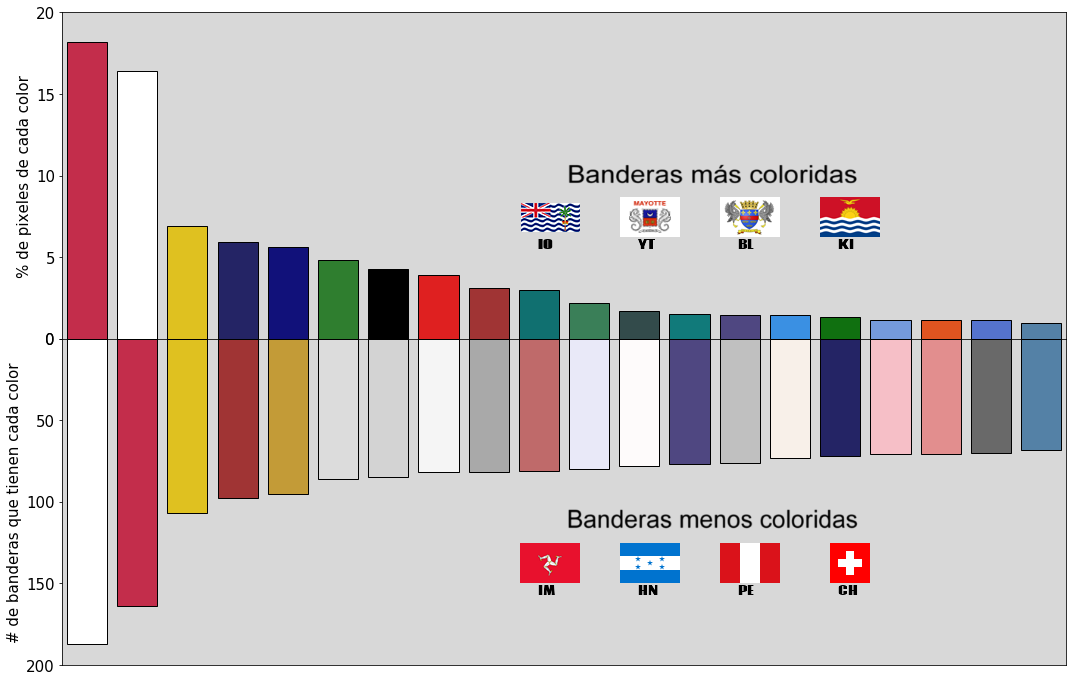

In [8]:
from flag_utils import add_text

df_colors = df_flags.loc[:, ["color", "r", "g", "b"]].copy()
df_colors.loc[:,["r","g","b"]] = df_colors.loc[:,["r","g","b"]]/255 # tiene que estar de 0 a 1
dict_colors = df_colors.set_index('color').T.apply(tuple).to_dict() # diccionario de colores para el grafico

fig, ax = plt.subplots(2, 1, figsize=(18,12))

# =========== Grafico de porcentaje de pixeles ======================
df_flags = df_flags.sort_values(by="percentage of pixels", ascending=False)
df_flags_limited = df_flags.head(20).copy()
sns.barplot(ax=ax[0], x = "color", y = "percentage of pixels", data = df_flags_limited, palette=dict_colors, edgecolor="k",)
# ===================================================================

# =========== Grafico de numero de banderas =========================
df_flags = df_flags.sort_values(by="sum_unique", ascending=False)
df_flags_limited = df_flags.head(20).copy()
sns.barplot(ax=ax[1], x = "color", y = "sum_unique", data = df_flags_limited, palette=dict_colors, edgecolor="k",)
# ===================================================================

# =========== Arreglo de los graficos ===============================
ax[1].invert_yaxis()
ax[0].set_xlabel('')
ax[1].set_xlabel('')

ax[0].set_ylabel("% de pixeles de cada color", fontsize=15)
ax[1].set_ylabel("# de banderas que tienen cada color", fontsize=15)

for ax_i in ax:
    ax_i.set_xticks([])
    ax_i.set_facecolor(("#d8d8d8"))
plt.subplots_adjust(hspace=0)

ax[0].yaxis.set_ticks([0, 5, 10, 15, 20])
ax[0].yaxis.set_tick_params(labelsize=15)

ax[1].yaxis.set_ticks([0, 50, 100, 150, 200])
ax[1].yaxis.set_tick_params(labelsize=15)
# ===================================================================



# ========= Banderas mas y menos coloridas ==========================
path = "mas_coloridas.png"
img = Image.open(path)
fig.figimage(img, (fig.bbox.xmax/2.3), fig.bbox.ymax*0.57, zorder=10)

path = "menos_coloridas.png"
img = Image.open(path)
fig.figimage(img, (fig.bbox.xmax/2.3), fig.bbox.ymax*0.17, zorder=10)

i = 0
for index, row in most_col.iterrows():
    url = "https://www.countryflags.io/" + row["country"] + "/flat/64.png"
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img = add_text(img, row["country"])
    fig.figimage(img, (fig.bbox.xmax/2.5) + i, fig.bbox.ymax*0.5, zorder=10)
    i += 100

i = 0
for index, row in least_col.iterrows():
    url = "https://www.countryflags.io/" + row["country"] + "/flat/64.png"
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img = add_text(img, row["country"])
    fig.figimage(img, (fig.bbox.xmax/2.5) + i, fig.bbox.ymax*0.1, zorder=10)
    i += 100
# ===================================================================

plt.savefig('flags_plot.png',  bbox_inches='tight')
plt.show()


